In [81]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [82]:
sns.set_style("whitegrid")

In [83]:
with open(os.path.join("..", "data", "results", "alpha.json"), "r") as file:
    alphas_res = json.load(file)

with open(os.path.join("..", "data", "results", "Ds.json"), "r") as file:
    Ds_res = json.load(file)

In [115]:
def plot_dict(dict_data, name):
    keys = list(dict_data.keys())
    xs = np.array([float(i) for i in keys])
    f1_scores = [dict_data[i]["f1_score"] for i in keys]
    rmse_scores = [dict_data[i]["rmse"] for i in keys]

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    sns.lineplot(ax=ax[0], x=xs, y=f1_scores, lw=2)
    sns.lineplot(ax=ax[1], x=xs, y=rmse_scores, lw=2)
    ax[0].set_xlabel(f"absolute difference in {name} coefficients")
    ax[0].set_ylabel("f1-score")
    ax[1].set_xlabel(f"absolute difference in {name} coefficients")
    ax[1].set_ylabel("RMSE")
    if name != "alpha":
        ax[0].set_xscale("log")
        ax[1].set_xscale("log")
    plt.savefig(os.path.join("..", "data", "results", f"{name}_diff.pdf"))
    plt.show()

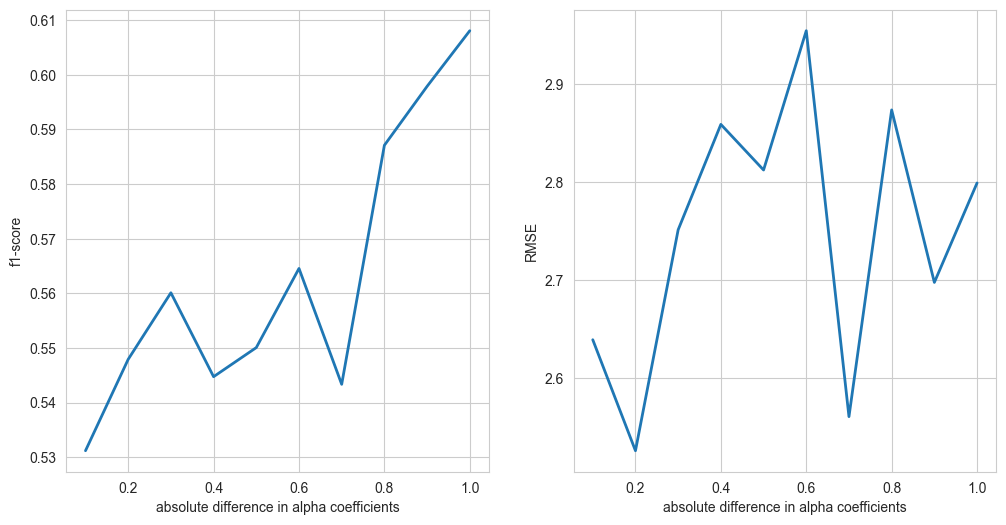

In [116]:
plot_dict(alphas_res, "alpha")

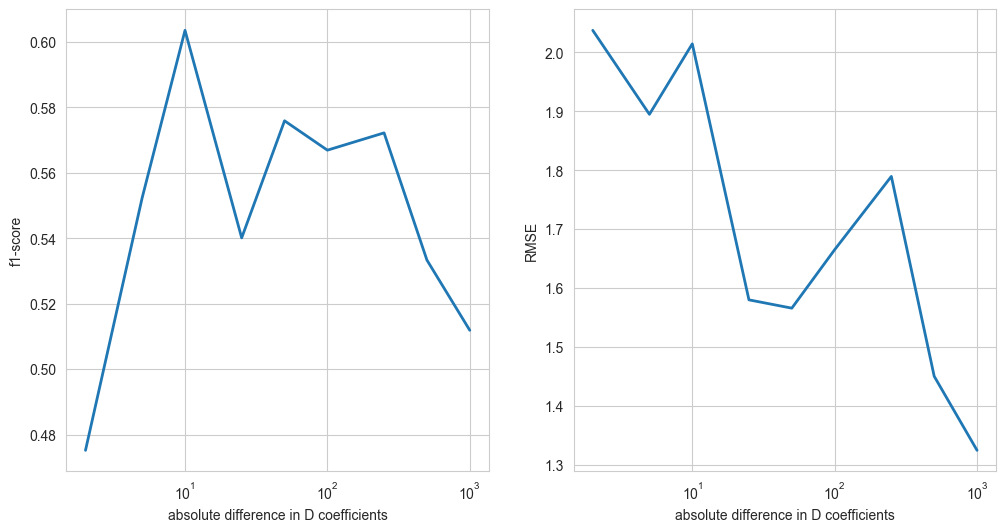

In [117]:
plot_dict(Ds_res, "D")

In [182]:
dt = 0.01
X = np.cumsum(dt * np.concatenate([np.array([0]), np.random.normal(0, 1, 10_000)]))
Y = np.cumsum(dt * np.concatenate([np.array([0]), np.random.normal(0, 1, 10_000)]))

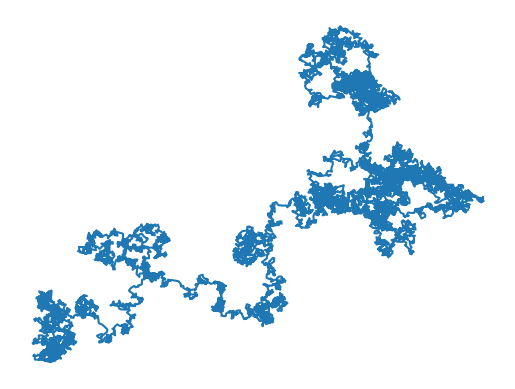

In [187]:
sns.lineplot(x=X, y=Y, sort=False)
plt.axis("off")
# set the background to transparent
plt.gcf().patch.set_alpha(0)
plt.show()